In [1]:
import scipy.misc
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import random
from sklearn.neighbors import KernelDensity

In [26]:
np.random.seed(1)
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]


[[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
   1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
  -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
   0.04221375  0.58281521 -1.10061918  1.14472371  0.90159072  0.50249434
   0.90085595 -0.68372786 -0.12289023 -0.93576943 -0.26788808  0.53035547
   4.30833925  4.60324647  4.3128273   4.15479436  4.32875387  4.9873354
   3.88268965  5.2344157   6.65980218  5.74204416  4.80816445  4.11237104
   4.25284171  6.6924546   5.05080775  4.36300435  5.19091548  7.10025514
   5.12015895  5.61720311  5.30017032  4.64775015  3.8574818   4.65065728
   4.79110577  5.58662319  5.83898341  5.93110208  5.28558733  5.88514116
   4.24560206  6.25286816  5.51292982  4.70190716  5.48851815  4.92442829
   6.13162939  6.51981682  7.18557541  3.60350366  3.55588619  4.49553414
   5.16003707  5.87616892  5.31563495  2.97779878  4.69379599  5.82797464
   5.23009474  5.76201118  4.77767186  4

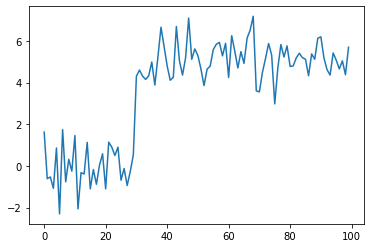

In [27]:
print(X.T)
print(X_plot[0:100].T)
print(X.shape)
print(X_plot.shape)
plt.plot(X)


[0.24  0.245 0.245 0.245 0.245 0.245 0.245 0.24  0.235 0.235 0.225 0.225
 0.225 0.22  0.22  0.22  0.22  0.22  0.215 0.21  0.2   0.2   0.2   0.2
 0.2   0.2   0.2   0.2   0.195 0.195 0.195 0.195 0.19  0.19  0.19  0.19
 0.18  0.18  0.175 0.175 0.18  0.165 0.165 0.165 0.16  0.16  0.145 0.145
 0.14  0.135 0.135 0.135 0.13  0.125 0.12  0.12  0.12  0.12  0.115 0.115
 0.11  0.105 0.105 0.105 0.105 0.105 0.1   0.095 0.095 0.095 0.095 0.095
 0.09  0.09  0.085 0.085 0.085 0.085 0.085 0.085 0.08  0.08  0.08  0.075
 0.07  0.07  0.07  0.07  0.065 0.06  0.06  0.055 0.05  0.05  0.05  0.045
 0.045 0.045 0.045 0.045]


Text(-3.5, 0.31, 'Tophat Kernel Density')

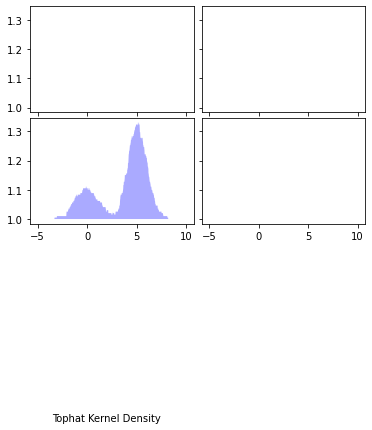

In [32]:
kde = KernelDensity(kernel='tophat', bandwidth=1).fit(X)
log_dens = np.exp(kde.score_samples(X_plot))
print(log_dens[700:800].T)
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")